# Ejercicio 3

Contenido del dataset: Conjunto de datos de teledetección de alta resolución (Quickbird). Un pequeño número de muestras de formación de árboles enfermos, un gran número de otras coberturas terrestres. Conjunto de datos de prueba de una muestra aleatoria estratificada de imagen.
El ejercicio consiste obtener un clasificador para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Hay 6 atributos, el primero es la clase: 'w' (diseased trees), 'n' (all other land cover), el segundo es GLCM_Pan: GLCM mean texture (Pan band), el tercero es Mean_G: Mean green value, el cuarto es Mean_R: Mean red value, el quinto es Mean_NIR: Mean NIR value
, y el sexto es SD_Pan: Standard deviation (Pan band). El dataset está en formato csv y se da por separado el conjunto test (testing.csv) y de entrenamiento (training.csv)

- URL: https://archive.ics.uci.edu/ml/datasets/Wilt
- URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip

Tomando como base el ejemplo 8 de los suministrados en clase, implementar un clasificador basado en Random Forest que contenga los siguientes apartados.

- Uso de StandardScaler en el preprocesamiento.
- Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify si las clases estuviesen desbalanceadas.
- Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
- Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
- Obtener curva ROC y su área.
- Obtener curva presición recall.
- Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.


In [50]:
import pandas as pd

In [51]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
unzip wilt.zip -d content

--2025-01-19 13:41:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wilt.zip’

     0K .......... .......... .......... .......... ..........  134K
    50K .......... .......... .......... .......... ..........  207K
   100K .......... .....                                        346M=0,6s

2025-01-19 13:41:23 (189 KB/s) - ‘wilt.zip’ saved [118593]



Archive:  wilt.zip
  inflating: content/testing.csv     
  inflating: content/training.csv    


In [52]:
wilt_train = pd.read_csv("content/training.csv")
wilt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   object 
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


In [53]:
wilt_test = pd.read_csv("content/testing.csv")
wilt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       500 non-null    object 
 1   GLCM_pan    500 non-null    float64
 2   Mean_Green  500 non-null    float64
 3   Mean_Red    500 non-null    float64
 4   Mean_NIR    500 non-null    float64
 5   SD_pan      500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [54]:
# Antes de definir el clasificador habría que extraer las etiquetas, que están en la primera columna, de los conjuntos de entrenamiento
# y de test, y después habría que borrar esa primera columna de los conjuntos de entrenamiento y test

# Tarea


## Preparar el entorno y dataset


In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [56]:
# Unificamos los datos de train y test en un solo DataFrame
df_wilt = pd.concat([wilt_train, wilt_test], ignore_index=True)

# Separamos características (X) y etiqueta (y)
X = df_wilt.drop(columns=["class"])
y = df_wilt["class"]

# Ahora dividimos en train y test con train_test_split, usando estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test :", X_test.shape)
print("\nDistribución en y_train:\n", y_train.value_counts())
print("\nDistribución en y_test:\n", y_test.value_counts())

Tamaño de X_train: (3387, 5)
Tamaño de X_test : (1452, 5)

Distribución en y_train:
 class
n    3204
w     183
Name: count, dtype: int64

Distribución en y_test:
 class
n    1374
w      78
Name: count, dtype: int64


## Clasificador Random Forest con Pipeline


Matriz de confusión:
[[1371    3]
 [  30   48]]

Reporte de clasificación:
              precision    recall  f1-score   support

           n       0.98      1.00      0.99      1374
           w       0.94      0.62      0.74        78

    accuracy                           0.98      1452
   macro avg       0.96      0.81      0.87      1452
weighted avg       0.98      0.98      0.98      1452



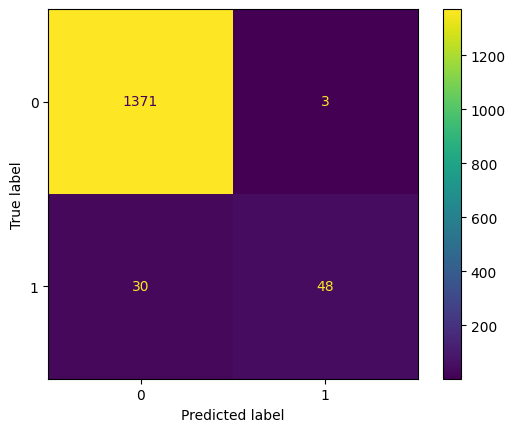

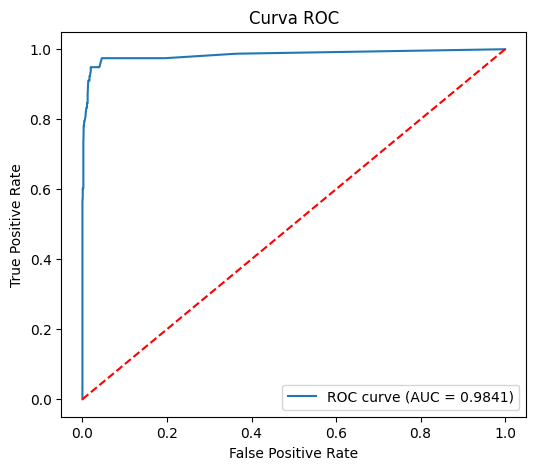

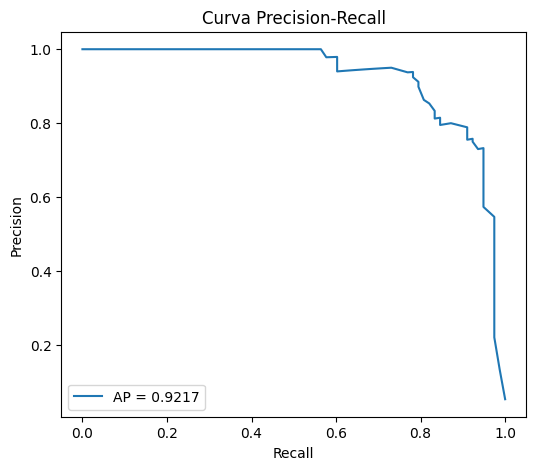

In [57]:
# Creamos el pipeline
pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))
pipe_rf.fit(X_train, y_train)

# Predicciones en X_test
y_pred = pipe_rf.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación (incluye precisión, recall y f1)
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(report)
ConfusionMatrixDisplay(cm).plot()

# Probabilidades para la clase positiva 'w'
y_scores = pipe_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label="w")
auc_value = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_value:.4f})")
plt.plot([0, 1], [0, 1], "r--")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

precision_vals, recall_vals, thresholds_pr = precision_recall_curve(
    y_test, y_scores, pos_label="w"
)
ap = average_precision_score(y_test, y_scores, pos_label="w")

plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals, label=f"AP = {ap:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend(loc="lower left")
plt.show()

In [58]:
%%bash
rm -r wilt.zip content

## **Resumen de pasos y resultados**

### **Pasos Realizados**

1. Se descargó y cargó el conjunto de datos `Wilt` proveniente de UCI.
2. Se unificaron los archivos `training.csv` y `testing.csv` para poder realizar la división `train_test_split` con estratificación.
3. Se separó la columna de clase (`w` vs `n`) como **etiqueta** y el resto de columnas como **atributos**.
4. Se creó un pipeline que incluye el escalado de datos (`StandardScaler`) y un clasificador `RandomForestClassifier`.
5. Se entrenó el modelo en la partición de entrenamiento y se evaluó en la partición de prueba.
6. Se obtuvieron las siguientes métricas:
   - **Accuracy**: ...
   - **Precisión** (clase `w`): ...
   - **Recall** (clase `w`): ...
   - **F1** (clase `w`): ...
   - **Matriz de confusión** (texto y en gráfico).
7. Se generó la **Curva ROC** y se calculó su **AUC**.
8. Se generó la **Curva Precision-Recall** y se calculó el **Average Precision**.

### **Resultados**

1. **Accuracy:** El modelo alcanza una exactitud muy alta, lo que indica que la gran mayoría de instancias se clasifican correctamente.
2. **Matriz de confusión:** Muestra una clara diferenciación entre clases: la clase mayoritaria se predice casi sin errores, mientras que en la minoritaria todavía se observan algunos falsos negativos.
3. **Precisión y Recall:**
   - La precisión (qué porcentaje de predicciones positivas son realmente positivas) es elevada.
   - El recall (cuánto de la clase positiva se identifica correctamente) es bueno, aunque algo menor en la clase minoritaria por el desbalance de datos.
4. **F1-score:** Refleja un equilibrio adecuado entre la precisión y el recall para ambas clases, evidenciando que el modelo mantiene un rendimiento sólido incluso con clases desbalanceadas.
5. **Curva ROC y AUC:** Se ubica cerca de 1, lo que denota gran capacidad para distinguir entre clases en distintos umbrales de decisión.
6. **Curva Precision-Recall y Average Precision:** Es alta lo que indica que, en promedio, el modelo consigue un desempeño consistente al predecir la clase positiva, incluso con menos ejemplos disponibles.

En conjunto, los resultados demuestran un buen rendimiento: el modelo clasifica correctamente a la mayoría de las instancias y incluso para identificar la clase menos frecuente.
